In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks");

# Symbolic Construction of Polynomial Chaos for Gaussian Random Variables

Consider the random variable:

$$
\Xi \sim N(0,1).
$$

The correct Hilbert space is:

$$
L^2(\Xi) = \left\{ f:\mathbb{R} \mapsto \mathbb{R} \middle| \mathbb{E}\left[f^2(\Xi)\right]\right\}.
$$

The inner product is:

$$
\langle f, g \rangle = \mathbb{E}\left[f(\Xi)g(\Xi)\right] = \int_{-\infty}^{\infty} f(\xi)g(\xi) \frac{1}{\sqrt{2\pi}} e^{-\frac{\xi^2}{2}} d\xi.
$$

Again, we will follow the Gram-Schmidt procedure to construct an orthonormal basis for this space.
We start with the monomials: $\{1, \xi, \xi^2, \ldots\}$.

In [3]:
import sympy
from sympy import pprint
sympy.init_printing()

xi = sympy.symbols('xi')

inner_product = lambda f, g: sympy.integrate(
    f * g  * sympy.exp(-xi ** 2 / 2) / sympy.sqrt(2 * sympy.pi),
    (xi, -sympy.oo, sympy.oo)
)
norm = lambda f: sympy.sqrt(inner_product(f, f))

def gram_schmidt(fs):
    gs = []
    for f in fs:
        g = f
        for h in gs:
            g -= inner_product(f, h) / inner_product(h, h) * h
        gs.append(g / norm(g))
    return gs

num_terms = 10
fs = [xi**i for i in range(num_terms)]
gs = gram_schmidt(fs)

for f in gs:
    pprint(f)

1
ξ
   ⎛ 2    ⎞
√2⋅⎝ξ  - 1⎠
───────────
     2     
   ⎛ 3      ⎞
√6⋅⎝ξ  - 3⋅ξ⎠
─────────────
      6      
   ⎛ 4      2    ⎞
√6⋅⎝ξ  - 6⋅ξ  + 3⎠
──────────────────
        12        
    ⎛ 5       3       ⎞
√30⋅⎝ξ  - 10⋅ξ  + 15⋅ξ⎠
───────────────────────
           60          
   ⎛ 6       4       2     ⎞
√5⋅⎝ξ  - 15⋅ξ  + 45⋅ξ  - 15⎠
────────────────────────────
             60             
    ⎛ 7       5        3        ⎞
√35⋅⎝ξ  - 21⋅ξ  + 105⋅ξ  - 105⋅ξ⎠
─────────────────────────────────
               420               
    ⎛ 8       6        4        2      ⎞
√70⋅⎝ξ  - 28⋅ξ  + 210⋅ξ  - 420⋅ξ  + 105⎠
────────────────────────────────────────
                  1680                  
    ⎛ 9       7        5         3        ⎞
√70⋅⎝ξ  - 36⋅ξ  + 378⋅ξ  - 1260⋅ξ  + 945⋅ξ⎠
───────────────────────────────────────────
                    5040                   


Now let's turn them to jax functions:

In [5]:
from jax import vmap, jit
from functools import partial
import jax.numpy as jnp

@partial(jit, static_argnums=(1, 2))
@partial(vmap, in_axes=(0,))
def basis(xi, xi_sym=xi, es_sym=gs):
    return jnp.array([
        sympy.lambdify(xi_sym, e, 'numpy')(xi)
        for e in es_sym
    ])

In [9]:
xis = jnp.linspace(-3, 3, 1000)
basis_values = basis(xis)
basis_values.shape

Here they are:

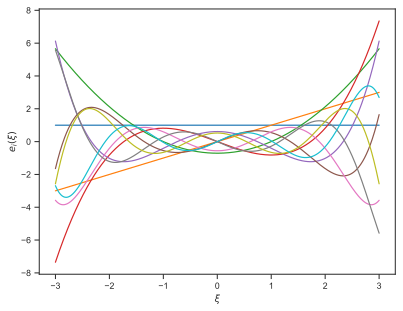

In [10]:
fig, ax = plt.subplots()
ax.plot(xis, basis_values)
ax.set(xlabel=r'$\xi$', ylabel=r'$e_i(\xi)$');

These are the Hermite polynomials.